<a href="https://colab.research.google.com/github/techisteps/KaggleCompetition/blob/main/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setup

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic
!unzip titanic.zip

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 8.52MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Import libraries and data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_label = train_data["Survived"]
train_data.drop("Survived", axis=1, inplace=True)

In [ ]:
train_data.dtypes
train_data.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

# Analysis

In [5]:
features_num = train_data.select_dtypes(include=[np.number]).columns
features_obj = train_data.select_dtypes(exclude=[np.number]).columns

print(f"features_num is: {features_num}")
print(f"features_obj is: {features_obj}")

features_num is: Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
features_obj is: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [ ]:
train_data["Ticket"].str.extractall(r'(\d+)')
tmp = train_data["Ticket"].str.extractall(r'(\D+)').replace(r'^\d+', '', regex=True).replace(r'/', '', regex=True).replace(r'\.', '', regex=True)
tmp = train_data["Ticket"].str.replace(r'\d+', '', regex=True).replace(r'\.', '', regex=True).replace(r' ', '', regex=True)
# tmp.columns = ["Ticket"]
# tmp["Ticket"].unique()
tmp.value_counts()
# type(tmp)

# train_data["Ticket"].unique()


Ticket
              661
PC             60
CA             41
A/             25
STON/O         18
SOTON/OQ       15
W/C            10
SC/PARIS        7
FCC             5
C               5
SOC             5
SC/Paris        4
LINE            4
SO/PP           3
A               3
PP              3
SC/AH           2
SOTON/O         2
WE/P            2
SW/PP           2
P/PP            2
FC              1
SC/AHBasle      1
A/S             1
SP              1
SC              1
SCO/W           1
Fa              1
SOP             1
WEP             1
SC/A            1
SO/C            1
CA/SOTON        1
Name: count, dtype: int64

## Feature Creation

### Feature PassengerId

In [6]:
## PassengerId is a sequence number thus doest have much waitage for training. we also can not drop this column as test data will come with this column.
## Best option will be to keep a constant value in this column 0 or 1.

feature_PassengerId = train_data["PassengerId"].copy()
feature_PassengerId = feature_PassengerId.map(lambda x: 0)
# feature_PassengerId
# train_data
# type(feature_PassengerId)

# def featureMK_PassengerId(df: pd.DataFrame):
#   feature_PassengerId = train_data[["PassengerId"]].copy()
#   feature_PassengerId = feature_PassengerId.map(lambda x: 0)
#   return feature_PassengerId

In [ ]:
# tmp = featureMK_PassengerId(train_data)
# type(tmp)
pd.__version__

'2.0.3'

### Feature Age

In [7]:
# train_data.isna().sum()
  # train_data['Age'].isna().sum()
# train_data.fillna(train_data["Age"].mean(), inplace=True)

def featureMK_Age(df: pd.DataFrame):
  # feature_Age = df.fillna(df["Age"].mean())["Age"]
  # return feature_Age

  meanage = df[['Age', 'Sex', 'Pclass']].groupby(['Sex', 'Pclass']).mean()
  # feature_Age = df[['Sex', 'Pclass']].merge(meanage, on=['Sex', 'Pclass'], how='left').fillna(df['Age'])['Age']
  feature_Age = df[['Sex', 'Pclass']].merge(meanage, on=['Sex', 'Pclass'], how='left')
  return feature_Age['Age']

# featureMK_Age(train_data)
# featureMK_Age(test_data)

# train_data['Age'].isna().sum()
# feature_Age = train_data.fillna(train_data["Age"].mean())["Age"]


# train_data.columns
# type(featureMK_Age(train_data))

### Feature Sex

In [8]:
# train_data["Sex"].isna().sum()

def featureMK_Sex(df: pd.DataFrame):
  feature_Sex = df[["Sex"]].copy()
  feature_Sex["Male"] = df["Sex"].map(lambda x: 0 if x == "male" else 1)
  feature_Sex["Female"] = df["Sex"].map(lambda x: 0 if x == "female" else 1)
  # type(feature_Sex)
  feature_Sex.drop(columns=["Sex"], axis=1, inplace=True)
  return feature_Sex

# featureMK_Sex(train_data)
# featureMK_Sex(test_data)

# feature_Sex = train_data[["Sex"]].copy()
# feature_Sex["Male"] = train_data["Sex"].map(lambda x: 0 if x == "male" else 1)
# feature_Sex["Female"] = train_data["Sex"].map(lambda x: 0 if x == "female" else 1)
# type(feature_Sex)
# feature_Sex.drop(columns=["Sex"], axis=1, inplace=True)
# feature_Sex

### Feature Pclass

In [9]:
# train_data["Pclass"].unique()

def featureMK_Pclass(df: pd.DataFrame):
  feature_Pclass = df[["Pclass"]].copy()
  feature_Pclass["Pclass1"] = df["Pclass"].map(lambda x: 1 if x == 1 else 0)
  feature_Pclass["Pclass2"] = df["Pclass"].map(lambda x: 1 if x == 2 else 0)
  feature_Pclass["Pclass3"] = df["Pclass"].map(lambda x: 1 if x == 3 else 0)
  feature_Pclass.drop(columns=["Pclass"], axis=1, inplace=True)
  return feature_Pclass

# feature_Pclass = train_data[["Pclass"]].copy()
# feature_Pclass["Pclass1"] = train_data["Pclass"].map(lambda x: 1 if x == 1 else 0)
# feature_Pclass["Pclass2"] = train_data["Pclass"].map(lambda x: 2 if x == 2 else 0)
# feature_Pclass["Pclass3"] = train_data["Pclass"].map(lambda x: 3 if x == 3 else 0)
# type(feature_Pclass)
# feature_Pclass.drop(columns=["Pclass"], axis=1, inplace=True)
# feature_Pclass

### Feature Fare

In [10]:
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, Normalizer
# train_data["Fare"].map(lambda x: math.log(x+1))

def featureMK_Fare(df: pd.DataFrame):
  # feature_Fare = df["Fare"].map(lambda x: math.log(x+1))
  # return feature_Fare

  x = df["Fare"] #returns a numpy array
  # min_max_scaler = MinMaxScaler()
  # x_scaled = min_max_scaler.fit_transform([x])
  # dfx = pd.DataFrame(x_scaled)
  # dfx

  norm = Normalizer()
  x_norm = norm.fit_transform([x])
  dfx = pd.DataFrame(x_norm).T
  dfx.columns = ["Fare"]
  return dfx

# feature_Fare = train_data["Fare"].map(lambda x: math.log(x+1))
# feature_Fare


tmp = featureMK_Fare(train_data)
type(tmp)
tmp.dtypes


Fare    float64
dtype: object

### Feature Embarked

In [11]:

def featureMK_Embarked(df: pd.DataFrame):
  feature_Embarked = df[["Embarked"]].copy()
  feature_Embarked["Embarked_S"] = df["Embarked"].map(lambda x: 1 if x == "S" else 0)
  feature_Embarked["Embarked_C"] = df["Embarked"].map(lambda x: 1 if x == "C" else 0)
  feature_Embarked["Embarked_Q"] = df["Embarked"].map(lambda x: 1 if x == "Q" else 0)
  feature_Embarked.drop(columns=["Embarked"], axis=1, inplace=True)
  return feature_Embarked

# feature_Embarked = train_data[["Embarked"]].copy()
# feature_Embarked["Embarked_S"] = train_data["Embarked"].map(lambda x: 1 if x == "S" else 0)
# feature_Embarked["Embarked_C"] = train_data["Embarked"].map(lambda x: 1 if x == "C" else 0)
# feature_Embarked["Embarked_Q"] = train_data["Embarked"].map(lambda x: 1 if x == "Q" else 0)
# type(feature_Embarked)
# feature_Embarked.drop(columns=["Embarked"], axis=1, inplace=True)
# feature_Embarked

### Feature Cabin

In [12]:
# train_data.duplicated(subset=["Cabin"]).to_numpy()
# train_data["Cabin"].loc[train_data.duplicated(subset=["Cabin"])].to_frame()
# train_data["Cabin"].map(lambda x: str(x)[0]).unique()

def featureMK_Cabin(df: pd.DataFrame):
  feature_Cabin = df[["Cabin"]].copy()
  feature_Cabin["CabinA"] = df["Cabin"].map(lambda x: 1 if str(x)[0] == 'A' else 0)
  feature_Cabin["CabinB"] = df["Cabin"].map(lambda x: 1 if str(x)[0] == 'B' else 0)
  feature_Cabin["CabinC"] = df["Cabin"].map(lambda x: 1 if str(x)[0] == 'C' else 0)
  feature_Cabin["CabinD"] = df["Cabin"].map(lambda x: 1 if str(x)[0] == 'D' else 0)
  feature_Cabin["CabinE"] = df["Cabin"].map(lambda x: 1 if str(x)[0] == 'E' else 0)
  feature_Cabin["CabinF"] = df["Cabin"].map(lambda x: 1 if str(x)[0] == 'F' else 0)
  feature_Cabin["CabinG"] = df["Cabin"].map(lambda x: 1 if str(x)[0] == 'G' else 0)
  feature_Cabin["CabinT"] = df["Cabin"].map(lambda x: 1 if str(x)[0] == 'T' else 0)
  feature_Cabin.drop(columns=["Cabin"], axis=1, inplace=True)

# feature_Cabin = train_data[["Cabin"]].copy()
# feature_Cabin["CabinA"] = train_data["Cabin"].map(lambda x: 1 if str(x)[0] == 'A' else 0)
# feature_Cabin["CabinB"] = train_data["Cabin"].map(lambda x: 1 if str(x)[0] == 'B' else 0)
# feature_Cabin["CabinC"] = train_data["Cabin"].map(lambda x: 1 if str(x)[0] == 'C' else 0)
# feature_Cabin["CabinD"] = train_data["Cabin"].map(lambda x: 1 if str(x)[0] == 'D' else 0)
# feature_Cabin["CabinE"] = train_data["Cabin"].map(lambda x: 1 if str(x)[0] == 'E' else 0)
# feature_Cabin["CabinF"] = train_data["Cabin"].map(lambda x: 1 if str(x)[0] == 'F' else 0)
# feature_Cabin["CabinG"] = train_data["Cabin"].map(lambda x: 1 if str(x)[0] == 'G' else 0)
# feature_Cabin["CabinT"] = train_data["Cabin"].map(lambda x: 1 if str(x)[0] == 'T' else 0)
# feature_Cabin.drop(columns=["Cabin"], axis=1, inplace=True)
# type(feature_Cabin)
# feature_Cabin

## Feature Selection

In [13]:
## TODO : Convert feature generation for functions returing series or DF

# train_data_in = pd.concat([feature_PassengerId, feature_Age, feature_Sex, feature_Pclass, feature_Fare, train_data['SibSp'], train_data['Parch'], feature_Embarked, feature_Cabin], axis=1)
train_data_in = pd.concat([feature_PassengerId, featureMK_Age(train_data), featureMK_Sex(train_data), featureMK_Pclass(train_data), featureMK_Fare(train_data), train_data['SibSp'], train_data['Parch'], featureMK_Embarked(train_data), featureMK_Cabin(train_data)], axis=1)
# train_data_in = pd.concat([train_data_in, train_data['SibSp'], train_data['Parch']], axis=1)

# test_data_in = pd.concat([test_data['PassengerId'], featureMK_Age(test_data), featureMK_Sex(test_data), featureMK_Pclass(test_data), featureMK_Fare(test_data), test_data['SibSp'], test_data['Parch'], featureMK_Embarked(test_data), featureMK_Cabin(test_data)], axis=1)


# test_data_in = test_data[features_num]
# test_data_in = test_data[["PassengerId", "Age"]]
train_data_in.dtypes

PassengerId      int64
Age            float64
Male             int64
Female           int64
Pclass1          int64
Pclass2          int64
Pclass3          int64
Fare           float64
SibSp            int64
Parch            int64
Embarked_S       int64
Embarked_C       int64
Embarked_Q       int64
dtype: object

In [27]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier


# train_data_in = train_data[features_num]
# test_data_in = test_data[features_num]

train_X, test_X, train_y, test_y = train_test_split(train_data_in, train_label, test_size=0.2, random_state=0)

# clf_rf = RandomForestClassifier(random_state=0, class_weight='balanced')
# clf_rf = RandomForestClassifier(random_state=0, class_weight={'3': '0', '4': '1'})
# clf_rf = GradientBoostingClassifier(random_state=0)
clf_rf = MLPClassifier(
      hidden_layer_sizes=(500,), activation='logistic', solver='sgd', alpha=0.0001, batch_size='auto', learning_rate='constant',
      learning_rate_init=0.01, power_t=0.5, max_iter=2000, shuffle=True, random_state=1, tol=0.0001, verbose=False, warm_start=False,
      momentum=0.5, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

clf_rf.fit(train_X, train_y)
print( "score: ", round( clf_rf.score(test_X, test_y) ,3) )
preds = clf_rf.predict(test_X)
print( "accuracy_score: ", round( accuracy_score(test_y, preds) ,3) )
print( "f1_score: ",round( f1_score(test_y, preds, average='weighted') , 3) )

# preds = clf_rf.predict(test_data_in)




score:  0.81
accuracy_score:  0.81
f1_score:  0.811


In [ ]:
train_X_v1, test_X_v1, train_y_v1, test_y_v1 = train_X, test_X, train_y, test_y

train_X_v1.var()


PassengerId     0.000000
Age            35.064444
Male            0.226882
Female          0.226882
Pclass1         0.182011
Pclass2         0.163237
Pclass3         0.247191
Fare            0.000805
SibSp           1.301520
Parch           0.674645
Embarked_S      0.199148
Embarked_C      0.148562
Embarked_Q      0.081923
dtype: float64

In [44]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_search_space = {
    "n_estimators": [100, 200, 300],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [2, 5, 7],
    # "gamma": [0.01, 0.1],
    # "learning_rate": [0.001, 0.01, 0.1, 1]
}

ada_search_space = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [2, 5, 7],
    # "gamma": [0.01, 0.1],
    "learning_rate": [0.001, 0.01, 0.1, 1]
}

gb_search_space = {
    "n_estimators": [100, 200, 300],
    "criterion": ["friedman_mse", "squared_error"],
    "max_depth": [2, 5, 7],
    # "gamma": [0.01, 0.1],
    "learning_rate": [0.001, 0.01, 0.1, 1]
}

hgbr_search_space = {
    # "loss": ["squared_error", "absolute_error"],
    "learning_rate": [0.001, 0.01, 0.1, 1],
    "max_iter": [100, 200, 300],
    "max_depth": [2, 5, 7],
}

kn_search_space = {
    # "loss": ["squared_error", "absolute_error"],
    "learning_rate": [0.001, 0.01, 0.1, 1],
    "max_iter": [100, 200, 300],
    "max_depth": [2, 5, 7],
}

dt_search_space = {
    # "loss": ["squared_error", "absolute_error"],
    "learning_rate": [0.001, 0.01, 0.1, 1],
    "max_iter": [100, 200, 300],
    "max_depth": [2, 5, 7],
}

lp_search_space = {
    # "loss": ["squared_error", "absolute_error"],
    "learning_rate": [0.001, 0.01, 0.1, 1],
    "max_iter": [100, 200, 300],
    "max_depth": [2, 5, 7],
}

MLP_search_space = {
    "hidden_layer_sizes": [(600,)],
    "activation" : ["tanh"],
    "solver" : ['sgd'],
    "alpha" : [0.0001],
    "batch_size" : ['auto'],
    "learning_rate" : ['constant'],
    "learning_rate_init" : [0.001],
    "power_t" : [0.5],
    "max_iter" : [2000],
    "shuffle" : [True],
    "random_state" : [1],
    "tol" : [0.0001],
    "verbose" : [False],
    "warm_start" : [False],
    "momentum" : [0.9],
    "nesterovs_momentum" : [True],
    "early_stopping" : [False],
    "validation_fraction" : [0.1],
    "beta_1" : [0.9],
    "beta_2" : [0.999],
    "epsilon" : [1e-08],
    "n_iter_no_change" : [10],
    "max_fun" : [15000]

}

model_search_space = MLP_search_space
modelVar = MLPClassifier()

GS = GridSearchCV(estimator= modelVar, param_grid= model_search_space, cv=3, scoring=["accuracy","f1"], refit="f1", verbose=4, error_score='raise')
GS.fit(train_X, train_y)
GS.best_params_

modelVar.fit(train_X, train_y)
pred_y = modelVar.predict(test_X)
modelVar.score(test_X, test_y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END activation=tanh, alpha=0.0001, batch_size=auto, beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(600,), learning_rate=constant, learning_rate_init=0.001, max_fun=15000, max_iter=2000, momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True, solver=sgd, tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=False; accuracy: (test=0.761) f1: (test=0.685) total time=  10.3s
[CV 2/3] END activation=tanh, alpha=0.0001, batch_size=auto, beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(600,), learning_rate=constant, learning_rate_init=0.001, max_fun=15000, max_iter=2000, momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True, solver=sgd, tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=False; accuracy: (test=0.810) f1: (test=0.734) total time

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8100558659217877

In [43]:
modelVar.score(test_X, test_y)
GS.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (600,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 2000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [61]:
from sklearn.metrics import confusion_matrix
modelVar = RandomForestClassifier()

modelVar.fit(train_X, train_y)
pred_y = modelVar.predict(test_X)
modelVar.score(test_X, test_y)
confusion_matrix(test_y, pred_y)

array([[94, 16],
       [13, 56]])

## lazypredict

In [ ]:
!pip install lazypredict-nightly

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.5
    Uninstalling MarkupSafe-2.1.5:
      Successfully uninstalled MarkupSafe-2.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == 

In [ ]:
from lazypredict import LazyClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# data = load_breast_cancer()
# X = data.data
# y= data.target

# train_X, test_X, train_y, test_y
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(train_X, test_X, train_y, test_y)

print(models)
print(predictions)

100%|██████████| 29/29 [00:01<00:00, 16.29it/s]

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

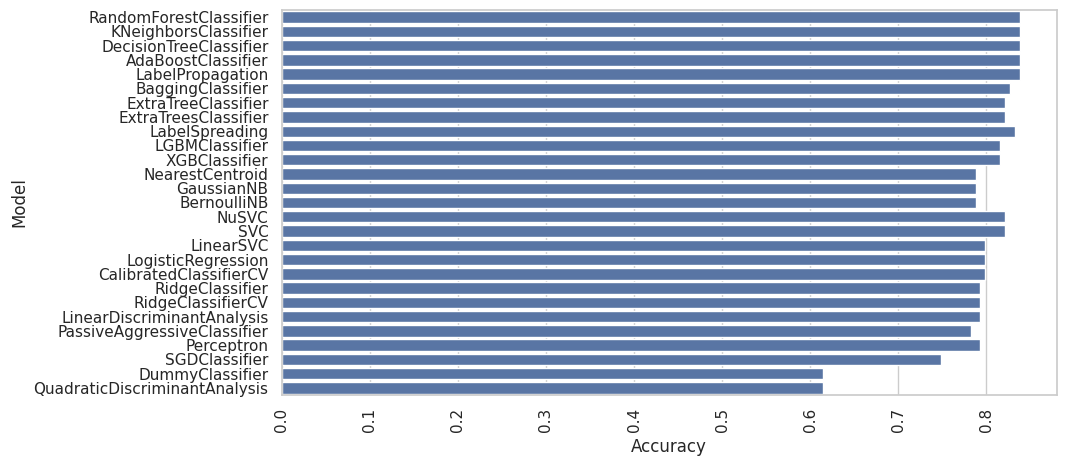

In [ ]:
# print(models)
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
# sns.barplot(x=models.index, y=models['Accuracy'])
ax = sns.barplot(y=models.index, x=models['Accuracy'])
plt.xticks(rotation=90)
plt.show()

# EDA

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')